### import necessariy modules


In [1]:
import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words
from word_sets import SHAHBAG_WORDS, FUNDAMENTALIST_WORDS, PROGRESSIVE_WORDS, PROGRESSIVE_WORDS_ENGLISH
from plot_utils import get_association_subplot, get_bias_plot, get_all_bias_in_single_plot_year_vs_label,get_all_bias_in_single_plot_label_vs_year
from plot_utils import get_correlation_heatmap

### load shahbag, fundamentalist & progressive occupation wordlist

In [2]:
target_groups = [PROGRESSIVE_WORDS]
target_group_labels = ['progressive_words']

reference_groups = [SHAHBAG_WORDS, FUNDAMENTALIST_WORDS]
reference_group_labels = ['shahbag', 'fundamental']

print('target group -->')
for group, labels in zip(target_groups, target_group_labels):
    print(labels, group)

print('reference group -->')
for group, labels in zip(reference_groups, reference_group_labels):
    print(labels, group)



b2e_dict = populate_b2e_dict_for_words(PROGRESSIVE_WORDS, PROGRESSIVE_WORDS_ENGLISH)


target group -->
progressive_words ['অভিনেতা', 'অভিনেত্রী', 'শিল্পী', 'শিক্ষাবিদ', 'চিত্রশিল্পী', 'কবি', 'নাট্যকার', 'লেখক', 'বিজ্ঞানী', 'গায়ক']
reference group -->
shahbag ['শাহবাগ', 'রাজাকার', 'চেতনা', 'একাত্তর', 'প্রগতিশীল', 'মুক্তমনা', 'সাঈদী', 'গণজাগরণ', 'মুক্তিযুদ্ধ', 'ধর্মনিরপেক্ষ', 'নাস্তিক']
fundamental ['ইসলামী', 'জঙ্গী', 'ফতোয়া', 'ইসলাম', 'জিহাদ', 'হাদিস', 'সুন্নাহ', 'কুরআন', 'নবী', 'আল্লামা', 'ইমান', 'পর্দা', 'হারাম']


In [3]:
calculate_association_distance = CalculateDistance()
calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)

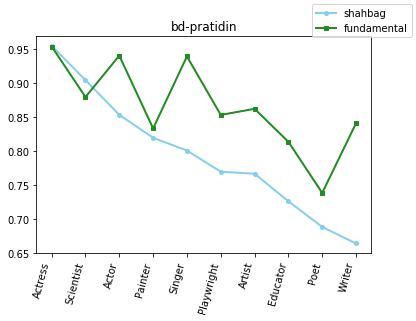

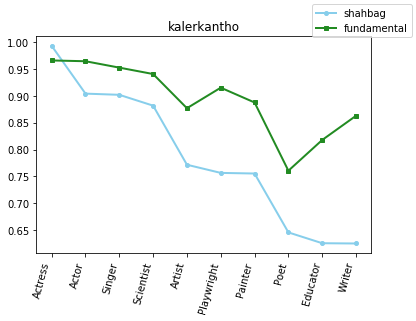

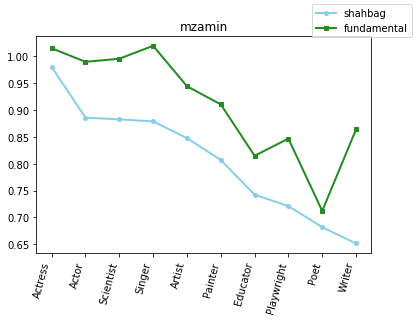

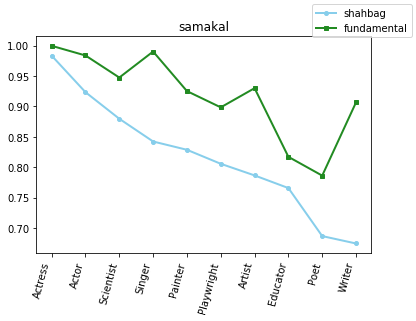

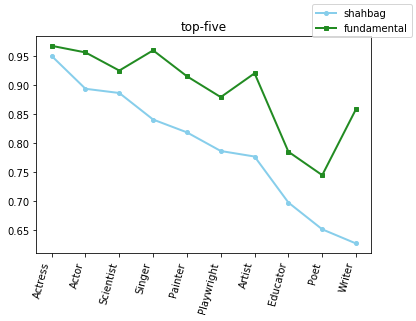

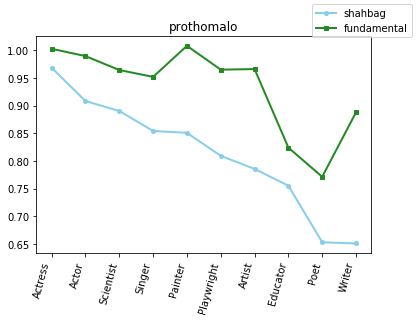

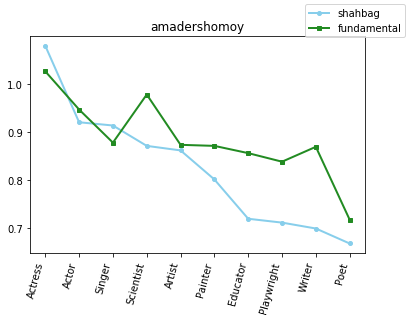

word সুন্নাহ not in embedding 


Traceback (most recent call last):
  File "/home/saurav_workspace/newspaper-biasness-analysis/calculate_distance.py", line 31, in __get_group_centroid
    word_vector = model.get_vector(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 471, in get_vector
    return self.word_vec(word)
  File "/root/miniconda3/envs/ner/lib/python3.6/site-packages/gensim/models/keyedvectors.py", line 468, in word_vec
    raise KeyError("word '%s' not in vocabulary" % word)
KeyError: "word 'সুন্নাহ' not in vocabulary"


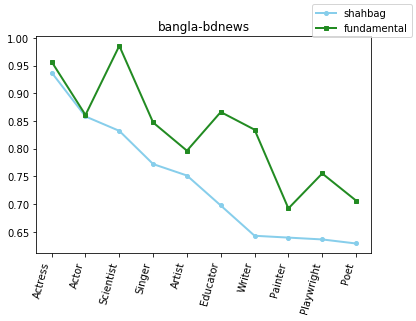

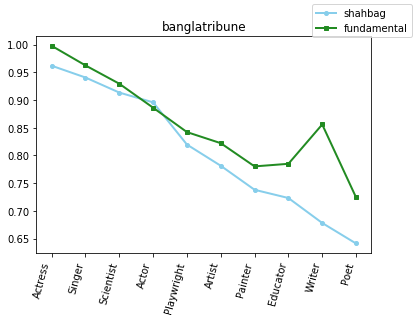

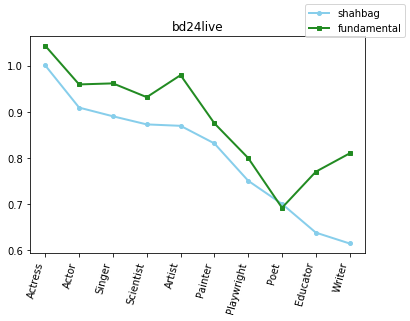

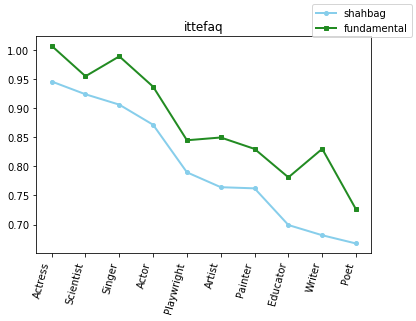

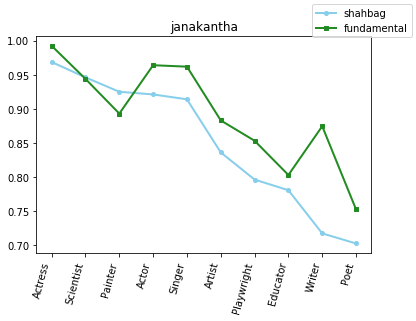

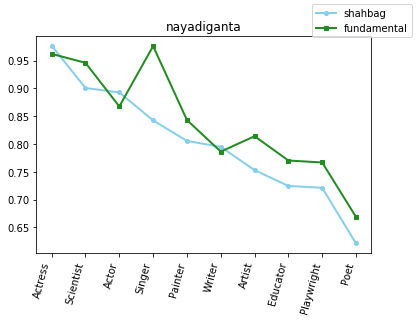

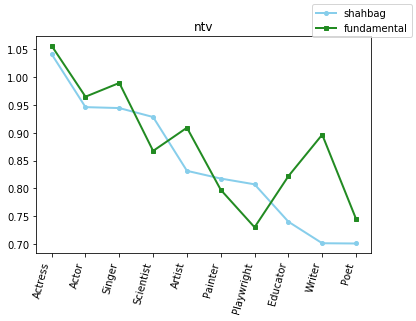

In [4]:
association_dict = {}
model_dir = '../newspaper_embedding/models/newspaper-wise/txt/'
filenames = glob.glob(model_dir + '*txt')
for filename in filenames:
    newspaper_name = filename.split('/')[-1].split('_')[0]
    target_wise_association_for_this_paper = {}
    model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_paper = calculate_association_distance.get_association_for_provided_embedding(model=model)
    association_dict[newspaper_name] = target_wise_association_for_this_paper
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_paper, b2e_dict = b2e_dict, title= newspaper_name)

### Calculate fundamentalism bias for all embedding

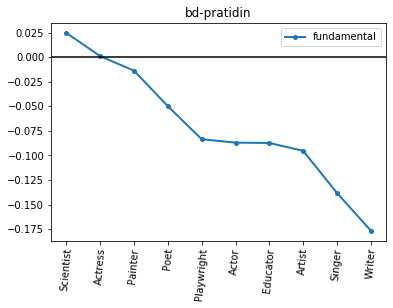

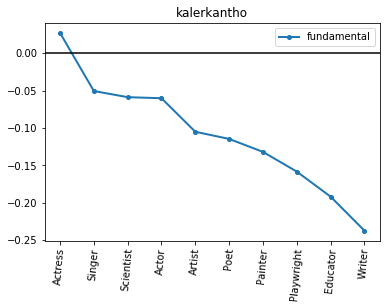

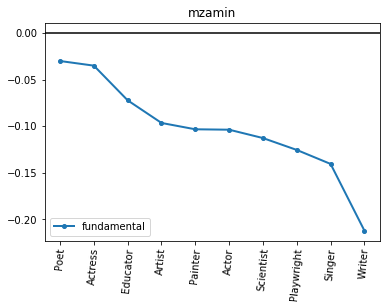

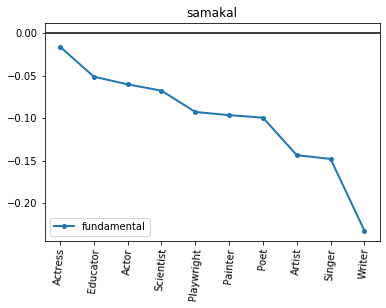

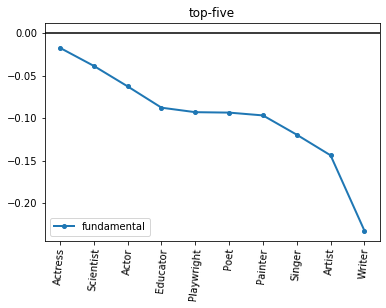

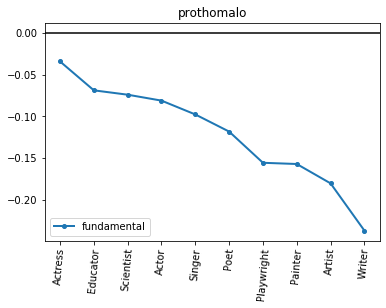

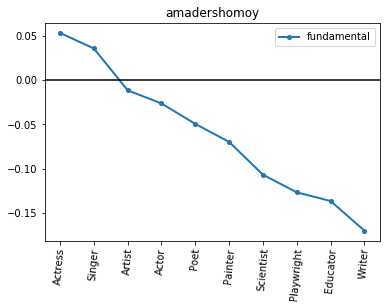

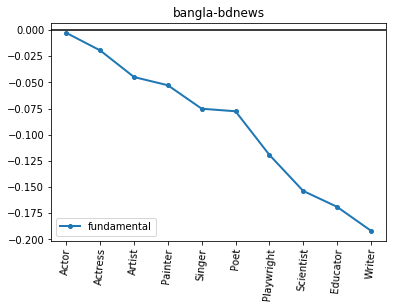

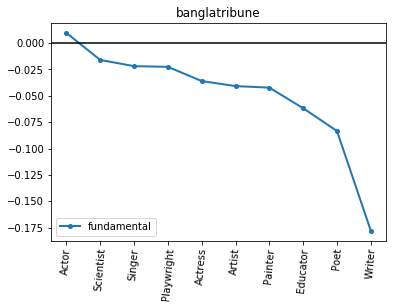

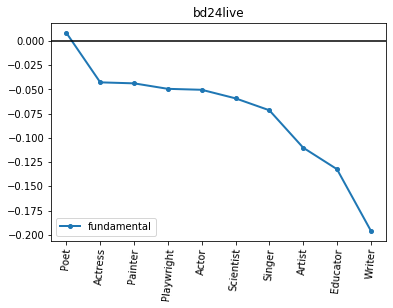

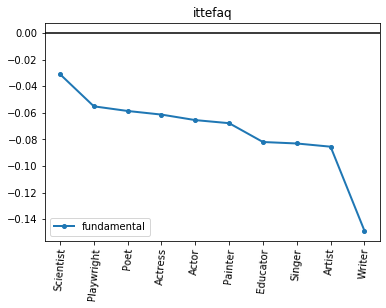

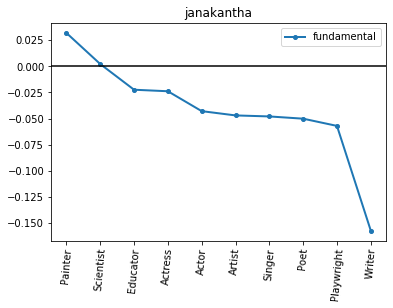

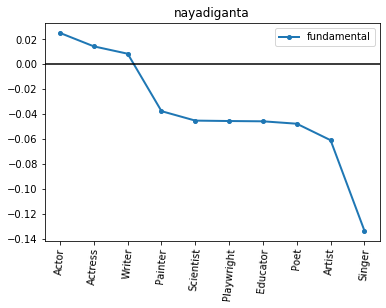

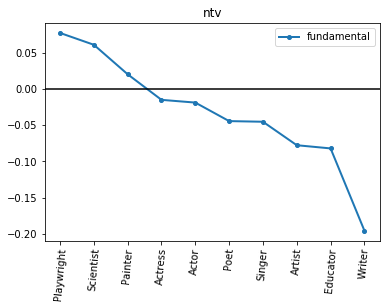

In [5]:
from plot_utils import get_bias_plot
male_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = target_group_labels[0], 
                                                                     reference_labels = reference_group_labels)

get_bias_plot(bias_dict=male_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = reference_group_labels[1])

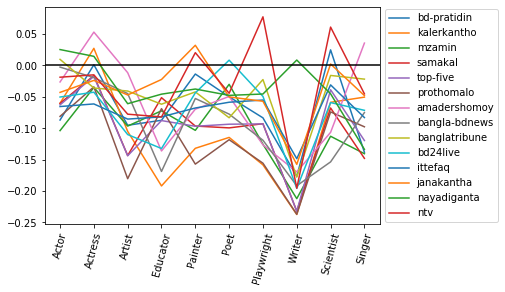

In [6]:
get_all_bias_in_single_plot_label_vs_year(bias_dict=male_bias_dict_for_all_embeddings, words=PROGRESSIVE_WORDS, labels=PROGRESSIVE_WORDS_ENGLISH)

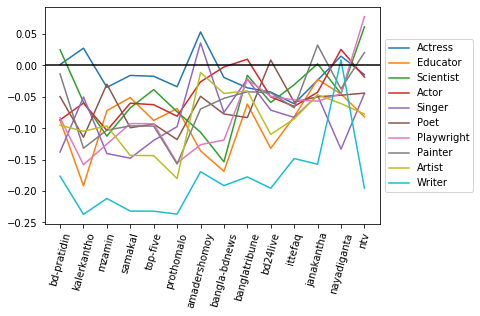

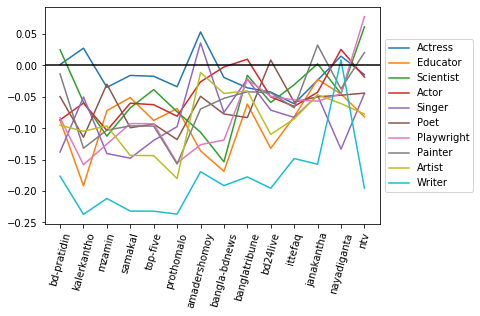

In [7]:
# print(male_bias_dict_for_all_embeddings)
get_all_bias_in_single_plot_year_vs_label(male_bias_dict_for_all_embeddings, b2e=b2e_dict)

get_all_bias_in_single_plot_year_vs_label(male_bias_dict_for_all_embeddings, b2e=b2e_dict, limit = 5)


In [8]:
import pandas as pd
df = pd.DataFrame.from_dict(male_bias_dict_for_all_embeddings)

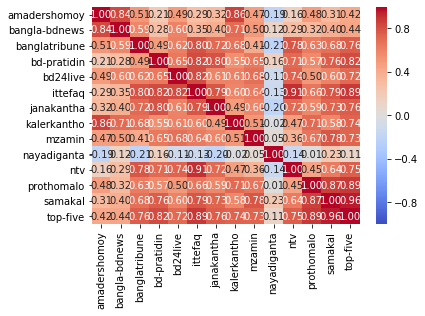

In [9]:
get_correlation_heatmap(df=df)